## Serial test

Idea: break the sequence $x_1, x_2, x_3, ..., x_{2n}$ into consecutive series of length $2$: $(x_1, x_2), (x_3, x_4), ..., (x_{2n-1}, x_{2n})$ and look at each element as a random and independent point in $2D$ space. Next, apply chi-square. Similarly, one can construct series of length $3, 4$, etc.

### Problem 1
Implement serial test and apply to a `samples`

In [5]:
import numpy as np
from scipy import stats

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1


# генерация выборки
random_samples = np.array([rng() for _ in range(1000)])

def uniformity_test(samples, series_length, num_bins):
    series_array = np.array([samples[i:i + series_length] for i in range(0, len(samples), series_length)])
    bin_edges = [np.linspace(0, 1, num_bins + 1) for _ in range(series_length)]

    obs_freq = np.histogramdd(series_array, bins=bin_edges)[0]
    exp_freq = np.full_like(obs_freq, fill_value=len(series_array) / num_bins**series_length, dtype=float)

    p_value = stats.chisquare(obs_freq.ravel(), exp_freq.ravel())

    return p_value

# пример
p_value_result = uniformity_test(random_samples, series_length=10, num_bins=5)
print(p_value_result)

Power_divergenceResult(statistic=9765525.000000075, pvalue=0.508875880994019)


### Problem 3

Provide a statistical test to show that `rng_bad` has problems but `rng_good` does not.

In [66]:
def rng_good(m=2**32, a=214013, c=2531011):
    rng_good.current = (a * rng_good.current + c) % m
    return rng_good.current / m
rng_good.current = 1

def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1
# покажем на примере теста Колмогорова - Смирнова

bad = [rng_bad() for _ in range(1000)]
good = [rng_good() for _ in range(1000)]

bad_p_value = ks_test(bad)
good_p_value = ks_test(good)
print('Kolmogorov-Smirnov P-value for BAD',_,stats.kstest(bad, 'uniform'))
print('Kolmogorov-Smirnov P-value for GOOD',_,stats.kstest(good, 'uniform'))

Kolmogorov-Smirnov P-value for BAD 2.0439640223089262e-14 KstestResult(statistic=0.03373850460723038, pvalue=0.20048846153312472, statistic_location=0.5847385046072304, statistic_sign=-1)
Kolmogorov-Smirnov P-value for GOOD 2.0439640223089262e-14 KstestResult(statistic=0.019144486922770765, pvalue=0.8499853512427036, statistic_location=0.30214448692277074, statistic_sign=-1)


### Problem 2*
Implement permutation test and apply to a `samples`

In [65]:
import numpy as np
from scipy.stats import chi2_contingency
from itertools import permutations
def permutation_test(samples, d):
    n = len(samples) // d
    series = np.array(samples[:n * d]).reshape(n, d)

    # Генерация всех возможных перестановок
    all_perms = list(permutations(range(d)))
    perm_counts = {perm: 0 for perm in all_perms}

    # Подсчет перестановок в сериях
    for s in series:
        sorted_indices = tuple(np.argsort(s))
        perm_counts[sorted_indices] += 1

    # Подготовка данных для критерия хи-квадрат
    observed = list(perm_counts.values())
    expected = [n / len(all_perms)] * len(all_perms)

    chi2, p, dof, expected = chi2_contingency([observed, expected])

    return chi2, p, perm_counts

# Пример
samples = np.random.rand(100)
d = 3
chi2, p_value, perm_counts = permutation_test(samples, d)

print(chi2, p_value)

4.396623262544521 0.4938328631244


### Problem 4
Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

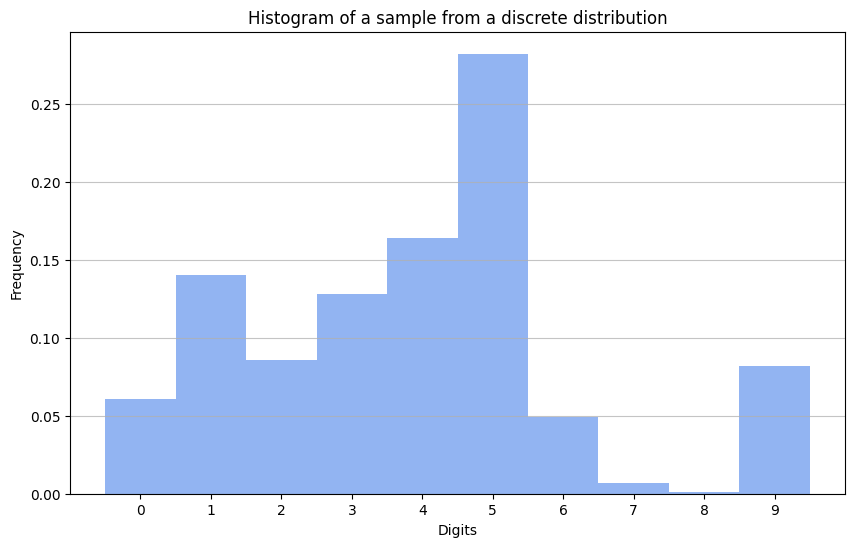

In [22]:
import numpy as np
import matplotlib.pyplot as plt

digits = np.arange(10)
weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])

# Нормализация весов
normalized_weights = weights / weights.sum()

# Генерация выборки из 1000 человек
sample_size = 1000
sample = np.random.choice(digits, size=sample_size, p=normalized_weights)

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(sample, bins=np.arange(11) - 0.5, density=True, alpha=0.7, color='cornflowerblue')
plt.title('Histogram of a sample from a discrete distribution')
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.xticks(digits)
plt.grid(axis='y', alpha=0.75)
plt.show()

### Problem 5
Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

## Inverse transform method

The following proposition is the idea behind the *inverse transform* method:

If $\xi$ has a uniform distribution in $[0,1]$, then $F^{-1}(\xi)$ is distributed according to the law of $F$. (For which $F$ is this true?)

$X\backsim Exp(λ)\implies \xi=F_{X}(x)=1-\exp(-λx)\mathbb{I}_{[0,+∞)}\implies F^{-1}_{X}(\xi)=-\frac{1}{λ}\ln(1-\xi)$

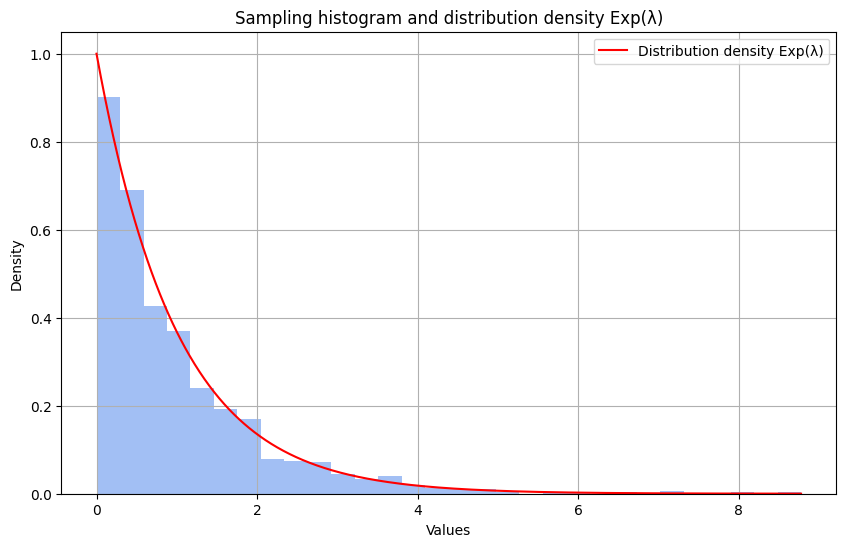

In [24]:
import numpy as np
import matplotlib.pyplot as plt

lambda_param = 1.0
sample_size = 1000
u = np.random.uniform(0, 1, sample_size)

# Обратное преобразование
sample = -np.log(1 - u) / lambda_param

plt.figure(figsize=(10, 6))
plt.hist(sample, bins=30, density=True, alpha=0.6, color='cornflowerblue')
x = np.linspace(0, np.max(sample), 1000)
pdf = lambda_param * np.exp(-lambda_param * x)
plt.plot(x, pdf, 'r-', label='Distribution density Exp(λ)', linewidth=1.5)
plt.title('Sampling histogram and distribution density Exp(λ)')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.grid()

plt.show()

### Problem 6
Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

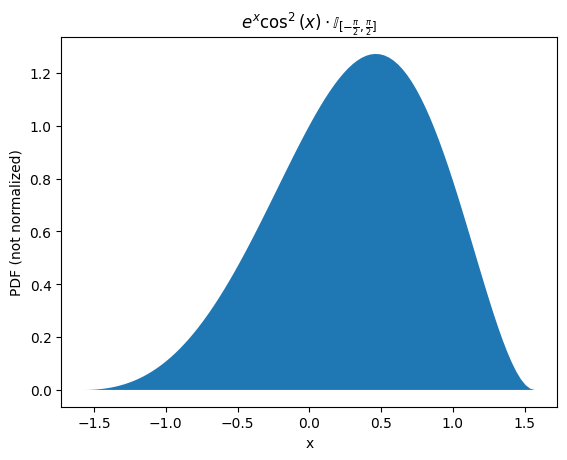

In [25]:
fig = plt.figure()

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x) * np.cos(x) ** 2 # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.title(r'$e^x \cos^2(x) \cdot \mathbb{I}_{[-\frac{\pi}{2}, \frac{\pi}{2}]}$')

plt.show()

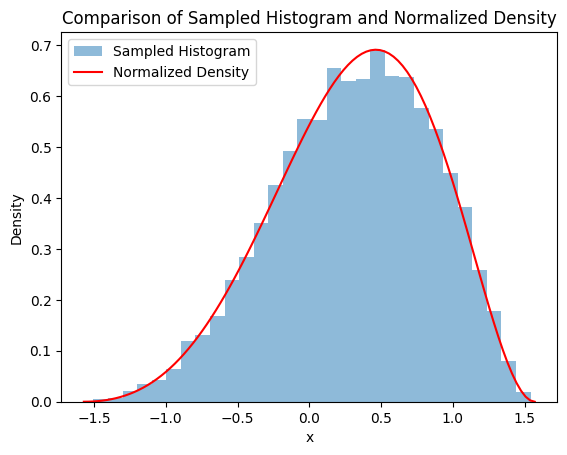

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def target_density(x):
    return np.exp(x) * np.cos(x) ** 2

# Вычисление нормировочной константы Z
Z, _ = quad(target_density, -np.pi/2, np.pi/2)

# Нормированная функция плотности
def normalized_density(x):
    return target_density(x) / Z

def proposal_distribution(x):
    return np.ones_like(x) / np.pi
x = np.linspace(-np.pi/2, np.pi/2, 1000)
M = np.max(target_density(x)) * np.pi

# Метод принятия-отклонения
def accept_reject_sampling(n_samples):
    samples = []
    while len(samples) < n_samples:
        x = np.random.uniform(-np.pi/2, np.pi/2)
        u = np.random.uniform(0, 1)
        if u < target_density(x) / (M * proposal_distribution(x)):
            samples.append(x)
    return np.array(samples)

samples = accept_reject_sampling(10000)

# Построение графика
plt.figure()
plt.hist(samples, bins=30, density=True, alpha=0.5, label='Sampled Histogram')
x_vals = np.linspace(-np.pi/2, np.pi/2, 100)
plt.plot(x_vals, normalized_density(x_vals), 'r-', label='Normalized Density')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Comparison of Sampled Histogram and Normalized Density')
plt.legend()
plt.show()

### Problem 7
Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

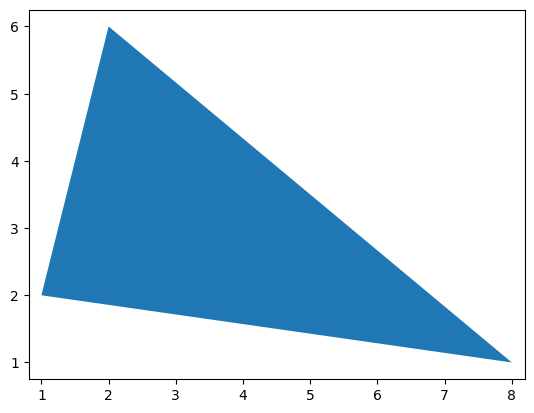

In [ ]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()

polygon = Polygon(xy=np.array([[1, 2], [2, 6], [8, 1]]), closed=True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

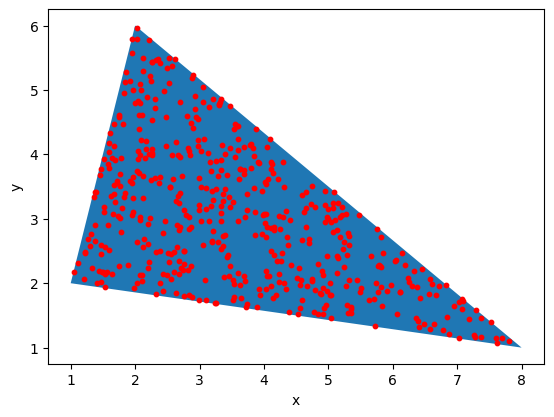

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# Определение вершин треугольника
vertices = np.array([[1, 2], [2, 6], [8, 1]])

# Генерация 500 точек внутри треугольника
def generate_points_in_triangle(vertices, n_points):
    points = []
    for _ in range(n_points):
        u, v = np.random.rand(2)
        if u + v > 1:
            u, v = 1 - u, 1 - v
        point = (1 - u - v) * vertices[0] + u * vertices[1] + v * vertices[2]
        points.append(point)
    return np.array(points)

# Генерация точек
points = generate_points_in_triangle(vertices, 500)

fig, ax = plt.subplots()
polygon = Polygon(vertices, closed=True)
ax.add_patch(polygon)
ax.scatter(points[:, 0], points[:, 1], s=10, color='red')
ax.set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Problem 8
Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

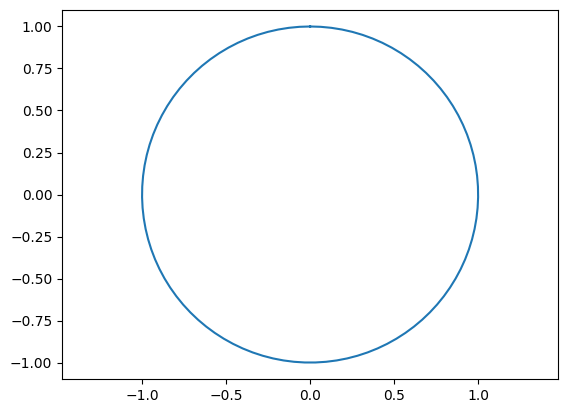

In [ ]:
fig = plt.figure()

t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

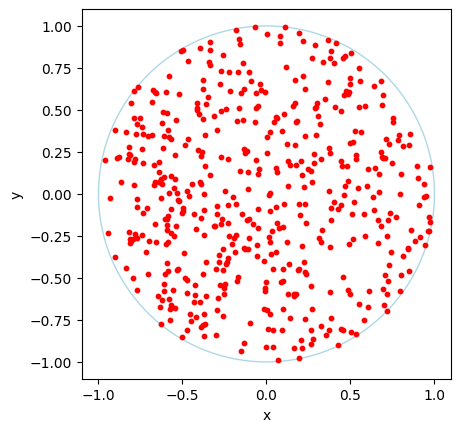

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация 500 точек внутри единичной окружности
def generate_points_in_circle(n_points):
    r = np.sqrt(np.random.uniform(0, 1, n_points))
    theta = np.random.uniform(0, 2 * np.pi, n_points)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

# Генерация точек
x, y = generate_points_in_circle(500)

# Визуализация
fig, ax = plt.subplots()
circle = plt.Circle((0, 0), 1, edgecolor='lightblue', facecolor='none')
ax.add_patch(circle)
ax.scatter(x, y, s=10, color='red')
ax.set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Problem 9
Prove (orally) that the following algorithm (**Box-Muller algorithm**, https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) generates a sample of independent $\mathcal{N}(0,1)$ random variables. Modify the method to exclude calls of trigonometric functions `np.sin` and `np.cos`. Using the modified method, simulate a sample size of $1000$ from a $2D$ Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$, where
$$\mu = \begin{pmatrix} 4 \\ 7 \end{pmatrix}^T, \quad \Sigma = \begin{pmatrix} 20 & -4 \\ -4 & 40 \end{pmatrix}.$$
Construct a 2D histogram of the resulting distribution. Compare the sample mean and covariance matrix with the exact values.

In [ ]:
import seaborn as sns

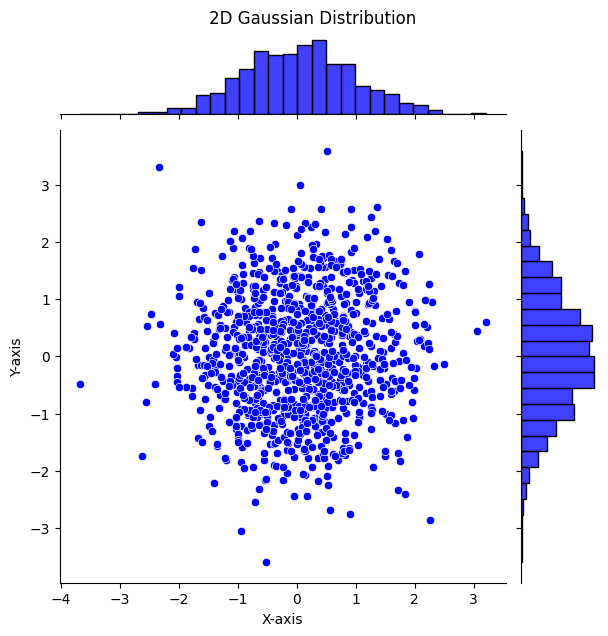

In [ ]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)


joint_plot = sns.jointplot(x=x, y=y, color="blue")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
plt.suptitle('2D Gaussian Distribution', y=1.02)
plt.show()

<Figure size 800x600 with 0 Axes>

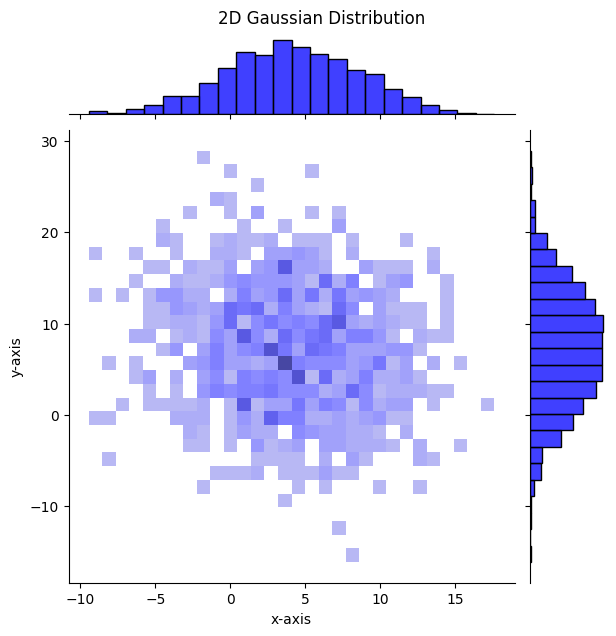

Sample Mean:
 [4.07866115 7.28289583]
Exact Mean:
 [4 7]
Sample Covariance Matrix:
 [[20.37187013 -3.76309   ]
 [-3.76309    41.62444007]]
Exact Covariance Matrix:
 [[20 -4]
 [-4 40]]


In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def box_muller_mod(n):
    samples = []
    while len(samples) < n:
        u1, u2 = np.random.uniform(-1, 1, 2)
        s = u1**2 + u2**2
        if s < 1 and s != 0:
            z0 = u1 * np.sqrt(-2 * np.log(s) / s)
            z1 = u2 * np.sqrt(-2 * np.log(s) / s)
            samples.extend([z0, z1])
    return np.array(samples[:n])

mu = np.array([4, 7])
Sigma = np.array([[20, -4], [-4, 40]])

n = 1000
z = box_muller_mod(2 * n).reshape(2, n)
L = np.linalg.cholesky(Sigma)
samples = (L @ z).T + mu

# Построение 2D гистограммы
plt.figure(figsize=(8, 6))
sns.jointplot(x=samples[:, 0], y=samples[:, 1], kind='hist', color="blue", bins=30)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.suptitle('2D Gaussian Distribution', y=1.02)
plt.show()

sample_mean = np.mean(samples, axis=0)
sample_cov = np.cov(samples, rowvar=False)

print("Sample Mean:\n", sample_mean)
print("Exact Mean:\n", mu)
print("Sample Covariance Matrix:\n", sample_cov)
print("Exact Covariance Matrix:\n", Sigma)